# Importing Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

# Import Data

In [3]:
import pandas as pd
data = pd.read_csv('hmnist_28_28_RGB.csv')
data.head()

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166        185        154   
1         55         25         14         28         25         14   
2        143        159        124        142        136        104   
3         36         25         12         17         25         12   
4        185        172        135        149        109         78   

   pixel2351  label  
0        177      2  
1         27      2  
2        117      2  
3         15      2  
4         92      2  

[5 rows x 2353 columns]

In [4]:
y = data['label']
x = data.drop(columns = ['label'])

# Exploratory Data Analysis (EDA)

In [5]:
tabular_data = pd.read_csv('HAM10000_metadata.csv')
tabular_data.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [6]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

# Frequency Distribution of Classes

Text(0.5, 1.0, 'Frequency Distribution of Classes')

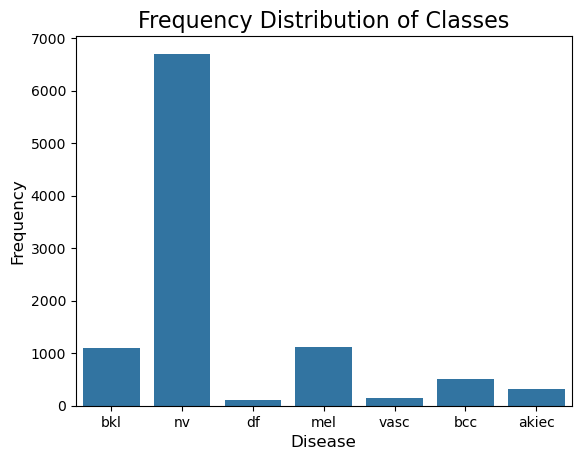

In [7]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

# Distribution of Disease over Gender

Text(0.5, 1.0, 'Gender of Patient')

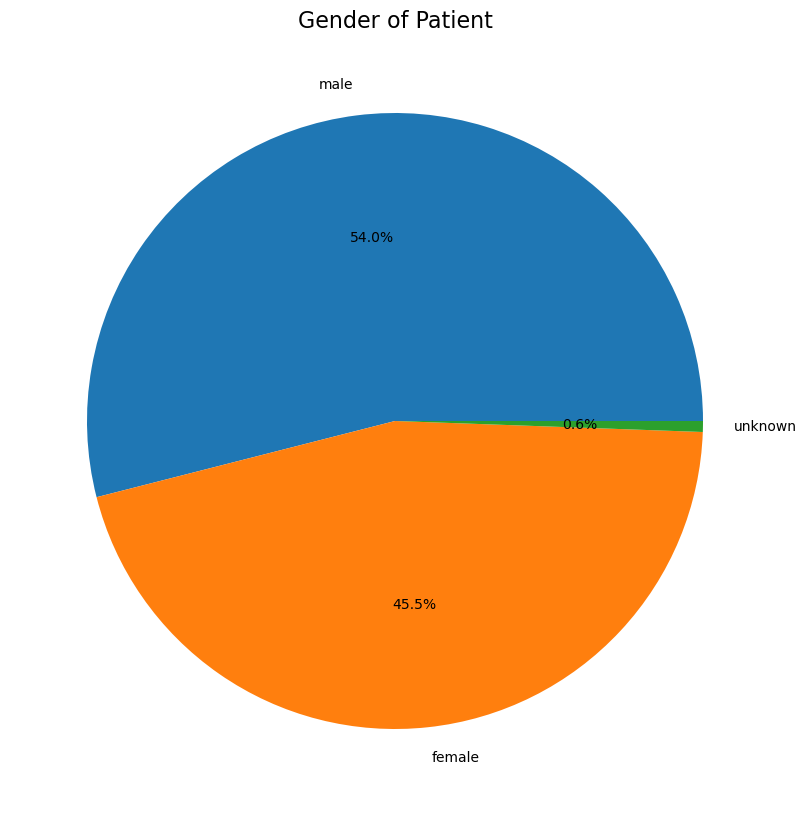

In [8]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

# Histogram of Age of Patients

Text(0.5, 1.0, 'Histogram of Age of Patients')

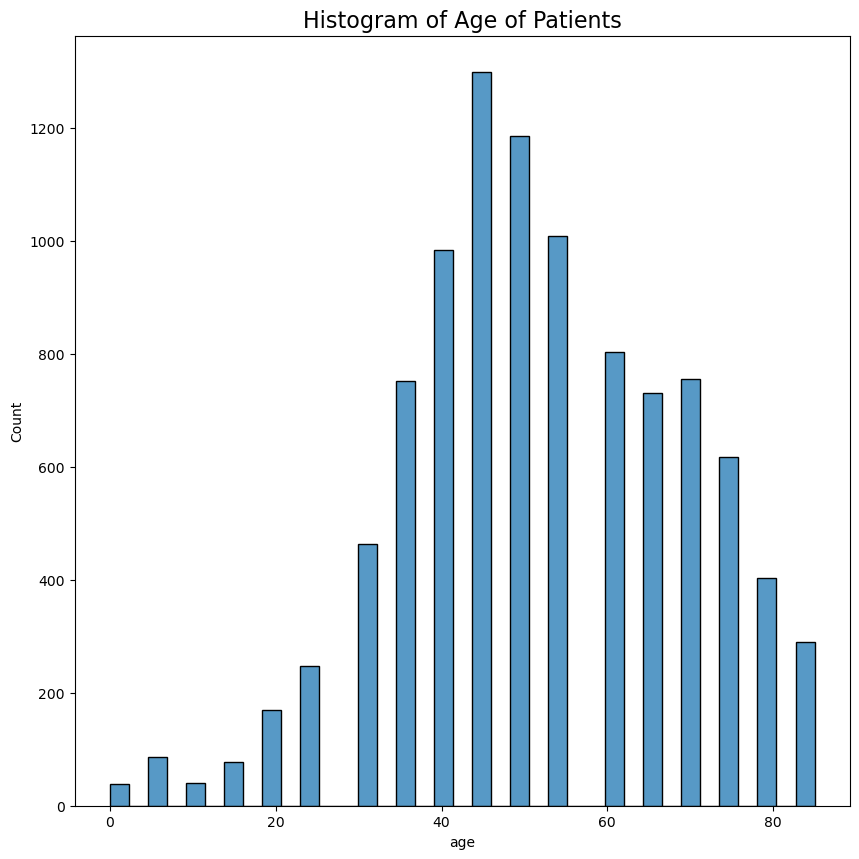

In [9]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)

# Location of disease over Gender

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

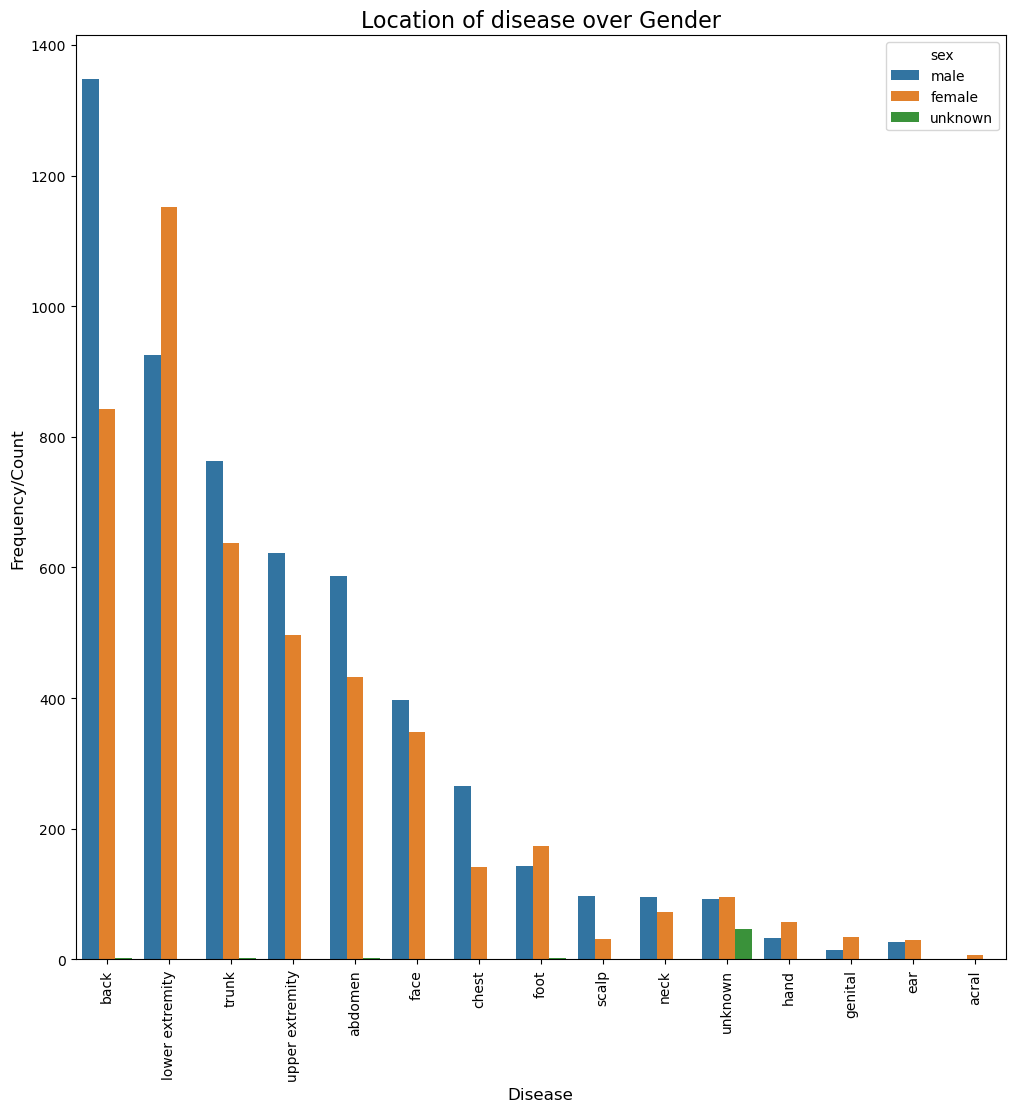

In [10]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

# Oversampling
**To overcome class imbalace**

In [11]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [12]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


C:\Users\priya\AppData\Local\Temp\ipykernel_24712\1807570631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


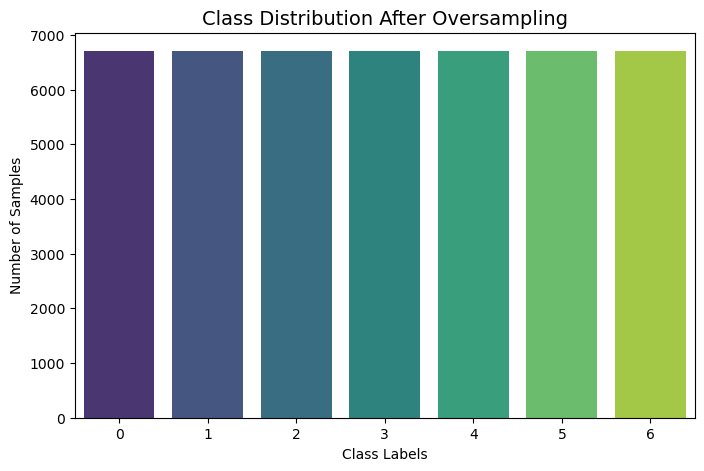

Class distribution after oversampling: Counter({2: 6705, 4: 6705, 3: 6705, 6: 6705, 5: 6705, 1: 6705, 0: 6705})


In [13]:
from collections import Counter
plt.figure(figsize=(8,5))
sns.countplot(x=y, palette='viridis')
plt.title("Class Distribution After Oversampling", fontsize=14)
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.show()

# Print numerical distribution
print("Class distribution after oversampling:", Counter(y))

In [14]:
# from imblearn.over_sampling import SMOTE
# import numpy as np

# # Initialize SMOTE
# smote = SMOTE(random_state=42)

# # Fit and resample
# x, y = smote.fit_resample(x, y)

# # Reshape to your original image dimensions
# x = np.array(x).reshape(-1, 28, 28, 3)
# print('Shape of X after SMOTE:', x.shape)
# print('Shape of y after SMOTE:', y.shape)


# Standardization and Splitting Data

In [15]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# Model Training

In [16]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

C:\Users\priya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,663 (713.53 KB)

 Trainable params: 182,663 (713.53 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)


In [18]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.4136 - loss: 1.4645 
Epoch 1: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 133ms/step - accuracy: 0.5375 - loss: 1.1921 - val_accuracy: 0.6776 - val_loss: 0.8475
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.7268 - loss: 0.7378 
Epoch 2: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 130ms/step - accuracy: 0.7517 - loss: 0.6710 - val_accuracy: 0.8004 - val_loss: 0.5347
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8256 - loss: 0.4748 
Epoch 3: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 127ms/step - accuracy: 0.8348 - loss: 0.4490 - val_accuracy: 0.8553 - val_loss: 0.4053
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8718 - loss: 0.3460 
Epoch 4: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 129ms/step - accuracy: 0.8834 - loss: 0.3179 - val_accuracy: 0.8899 - val_loss: 0.2974
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9052 - loss: 0.2617 
Epoch 5: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 127ms/step - accuracy: 0.9104 - loss: 0.2475 - val_accuracy: 0.9184 - val_loss: 0.2360
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9311 - loss: 0.1932 
Epoch 6: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 141ms/step - accuracy: 0.9277 - loss: 0.2013 - val_accuracy: 0.9208 - val_loss: 0.2234
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9476 - loss: 0.1516 
Epoch 7: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 131ms/step - accuracy: 0.9476 - loss: 0.1503 - val_accuracy: 0.9278 - val_loss: 0.2060
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9528 - loss: 0.1312 
Epoch 8: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 118ms/step - accuracy: 0.9516 - loss: 0.1370 - val_accuracy: 0.9280 - val_loss: 0.2176
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9585 - loss: 0.1170 
Epoch 9: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 127ms/step - accuracy: 0.9573 - loss: 0.1182 - val_accuracy: 0.9435 - val_loss: 0.1667
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9702 - loss: 0.0857 
Epoch 10: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 137ms/step - accuracy: 0.9686 - loss: 0.0889 - val_accuracy: 0.9405 - val_loss: 0.2015
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.9721 - loss: 0.0812 
Epoch 11: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - accuracy: 0.9685 - loss: 0.0887 - val_accuracy: 0.9116 - val_loss: 0.2646
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9678 - loss: 0.0921 
Epoch 12: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 129ms/step - accuracy: 0.9715 - loss: 0.0793 - val_accuracy: 0.9383 - val_loss: 0.1908
Epoch 13/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9799 - loss: 0.0588 
Epoch 13: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 142ms/step - accuracy: 0.9794 - loss: 0.0587 - val_accuracy: 0.9477 - val_loss: 0.1746
Epoch 14/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9858 - loss: 0.0430 
Epoch 14: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 153ms/step - accuracy: 0.9815 - loss: 0.0515 - val_accuracy: 0.9458 - val_loss: 0.2040
Epoch 15/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9777 - loss: 0.0671 
Epoch 15: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - accuracy: 0.9806 - loss: 0.0581 - val_accuracy: 0.9704 - val_loss: 0.1231
Epoch 16/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9891 - loss: 0.0328 
Epoch 16: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - accuracy: 0.9867 - loss: 0.0392 - val_accuracy: 0.9704 - val_loss: 0.1223
Epoch 17/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9873 - loss: 0.0372 
Epoch 17: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 137ms/step - accuracy: 0.9829 - loss: 0.0501 - val_accuracy: 0.9660 - val_loss: 0.1399
Epoch 18/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9860 - loss: 0.0444 
Epoch 18: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - accuracy: 0.9798 - loss: 0.0620 - val_accuracy: 0.9450 - val_loss: 0.1915
Epoch 19/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9843 - loss: 0.0436  
Epoch 19: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - accuracy: 0.9883 - loss: 0.0333 - val_accuracy: 0.9731 - val_loss: 0.1136
Epoch 20/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9943 - loss: 0.0173 
Epoch 20: saving model to best_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.9933 - loss: 0.0202 - val_accuracy: 0.9684 - val_loss: 0.1589


# Plot Accuracy and Loss

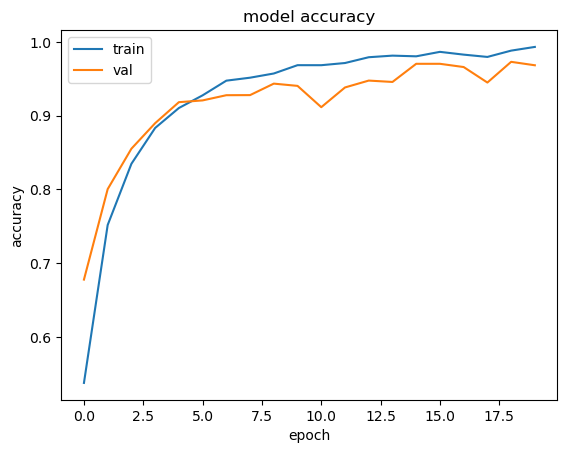

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

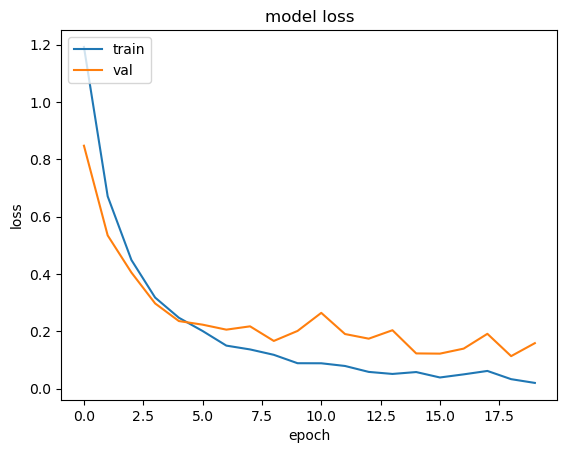

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
model.load_weights('best_model.h5')


294/294 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


<Figure size 1200x500 with 0 Axes>

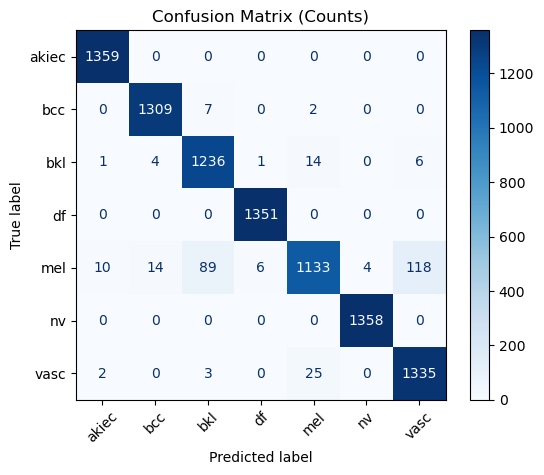

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = Y_test
# --- Define class names (example for HAM10000 dataset) ---
class_names = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# --- Confusion Matrix (Raw Counts) ---
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(12,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45, colorbar=True)
plt.title("Confusion Matrix (Counts)")
plt.show()

<Figure size 1200x500 with 0 Axes>

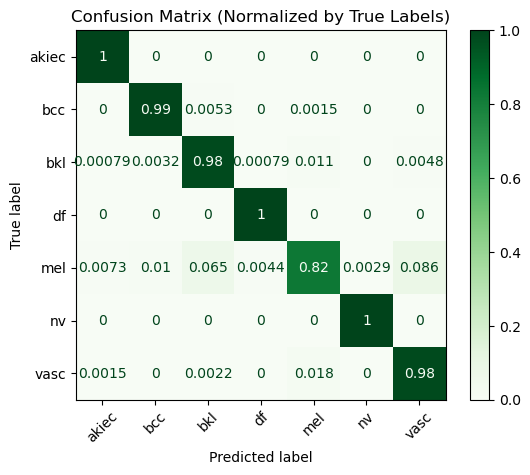

In [23]:
# --- Confusion Matrix (Normalized Percentages) ---
cm_normalized = confusion_matrix(y_true_classes, y_pred_classes, normalize='true')
plt.figure(figsize=(12,5))
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=class_names)
disp_norm.plot(cmap='Greens', xticks_rotation=45, colorbar=True)
plt.title("Confusion Matrix (Normalized by True Labels)")
plt.show()

# Model Testing

In [24]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 5s - 16ms/step - accuracy: 0.9674 - loss: 0.1488


# Model Inference

Model expects images of size: 28x28x3
Found 20 image(s) in folder.


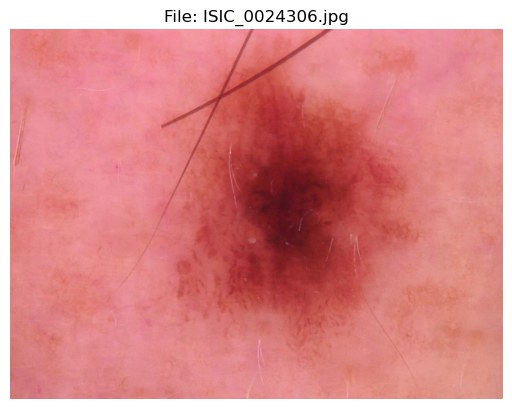

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Image: ISIC_0024306.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 0.92
--------------------------------------------------


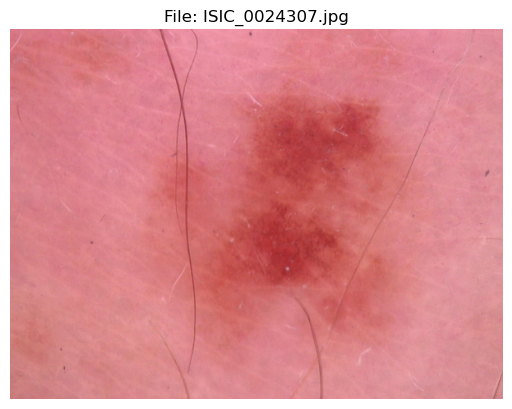

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Image: ISIC_0024307.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 0.93
--------------------------------------------------


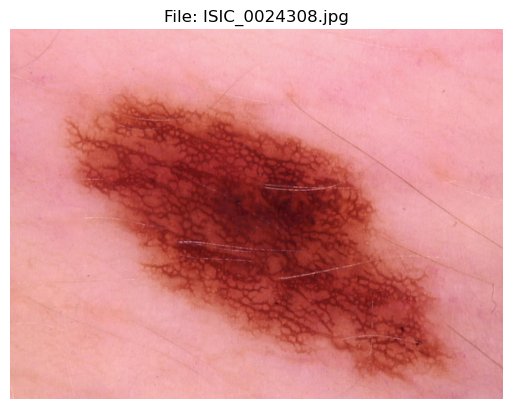

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Image: ISIC_0024308.jpg
Predicted Class   : ('nv', ' melanocytic nevi')
Prediction Confidence: 0.73
--------------------------------------------------


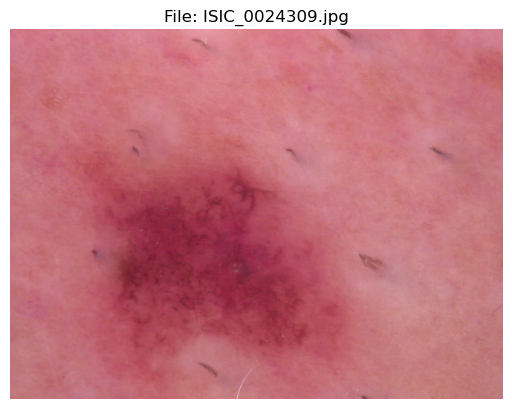

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Image: ISIC_0024309.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 0.72
--------------------------------------------------


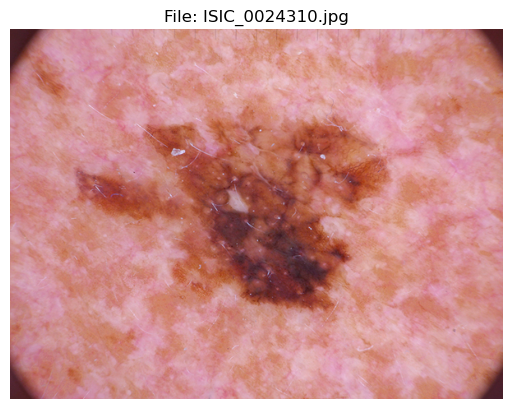

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Image: ISIC_0024310.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 0.72
--------------------------------------------------


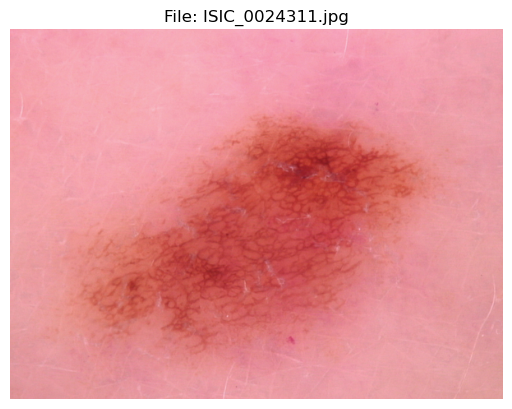

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Image: ISIC_0024311.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 0.80
--------------------------------------------------


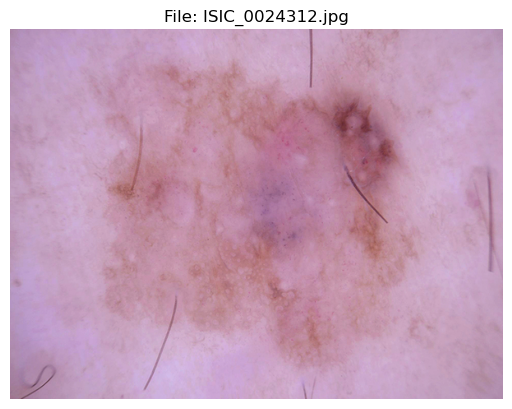

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Image: ISIC_0024312.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 1.00
--------------------------------------------------


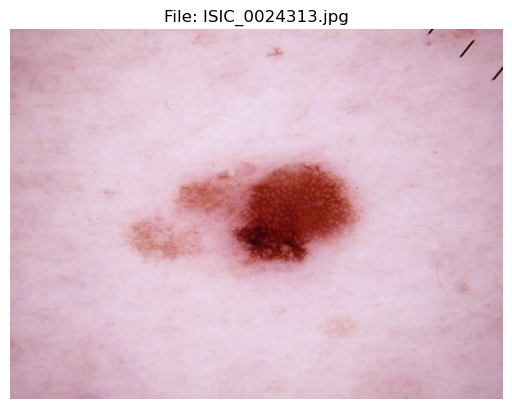

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Image: ISIC_0024313.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 0.99
--------------------------------------------------


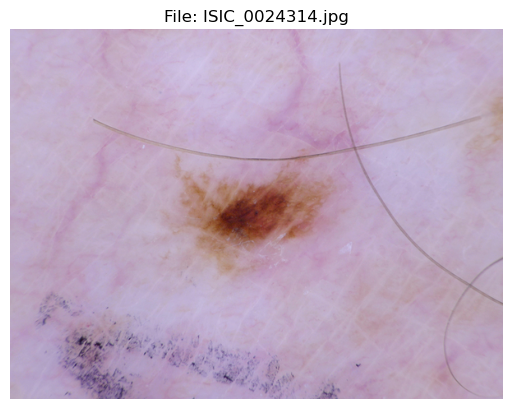

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Image: ISIC_0024314.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 1.00
--------------------------------------------------


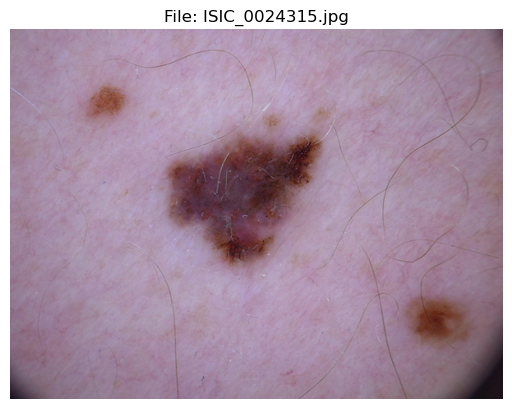

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Image: ISIC_0024315.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 0.99
--------------------------------------------------


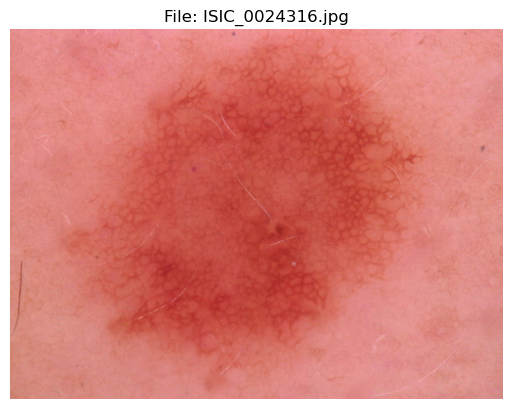

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Image: ISIC_0024316.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 0.84
--------------------------------------------------


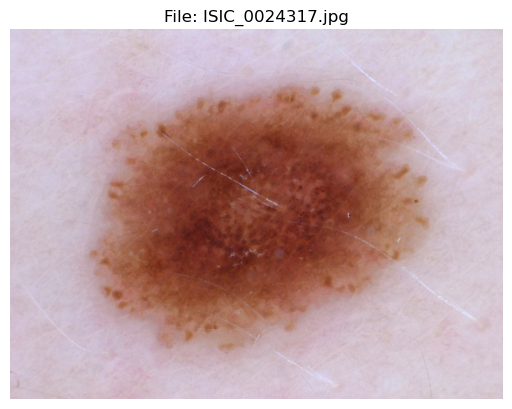

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Image: ISIC_0024317.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 0.99
--------------------------------------------------


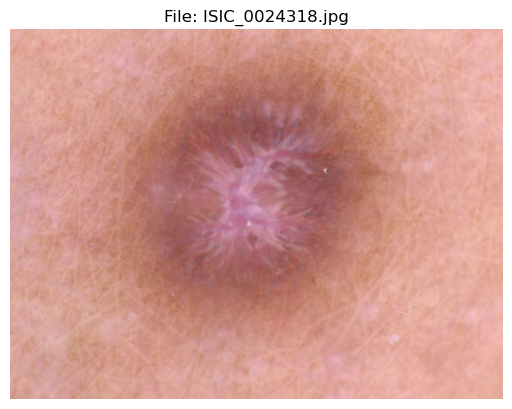

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Image: ISIC_0024318.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 0.99
--------------------------------------------------


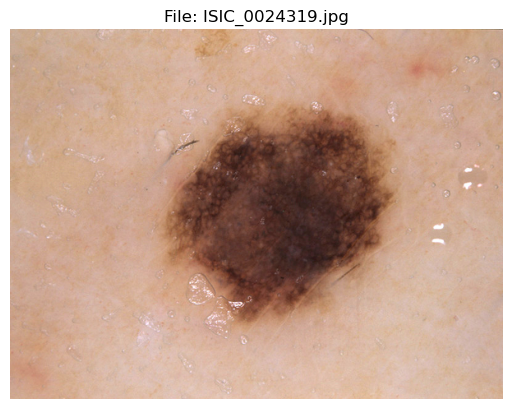

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Image: ISIC_0024319.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 0.99
--------------------------------------------------


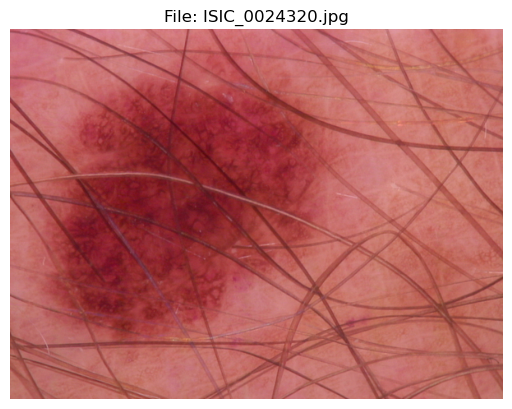

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Image: ISIC_0024320.jpg
Predicted Class   : ('nv', ' melanocytic nevi')
Prediction Confidence: 0.53
--------------------------------------------------


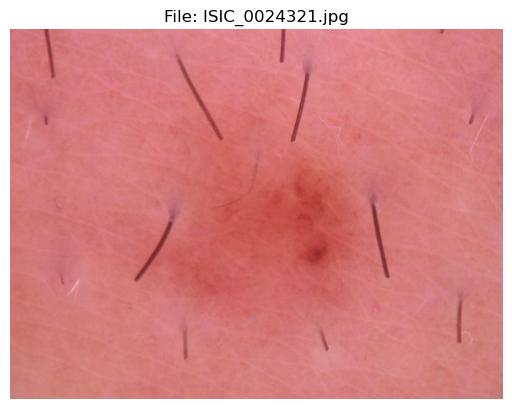

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Image: ISIC_0024321.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 0.87
--------------------------------------------------


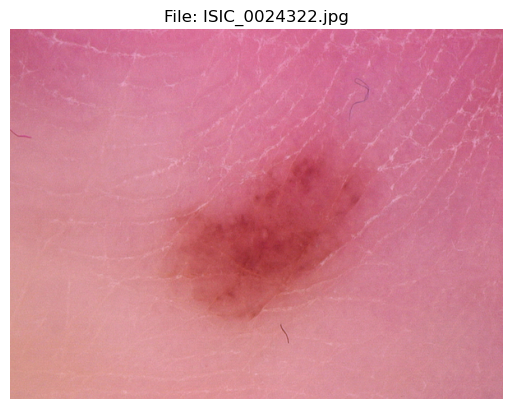

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Image: ISIC_0024322.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 0.97
--------------------------------------------------


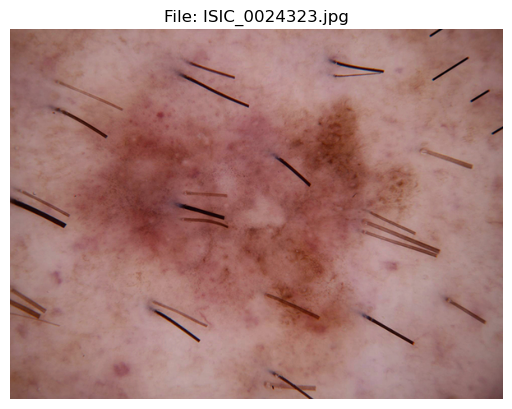

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Image: ISIC_0024323.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 0.93
--------------------------------------------------


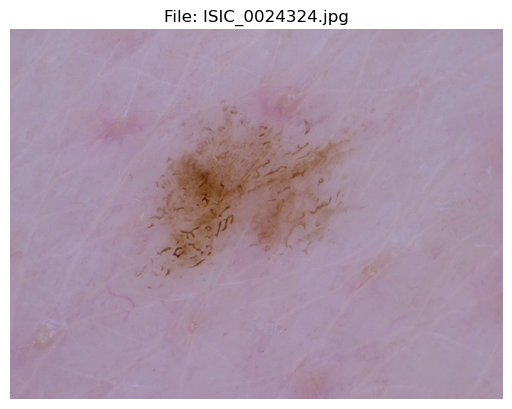

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Image: ISIC_0024324.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 1.00
--------------------------------------------------


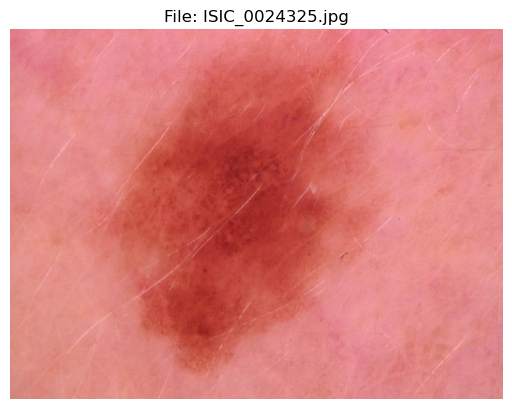

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Image: ISIC_0024325.jpg
Predicted Class   : ('bcc', ' basal cell carcinoma')
Prediction Confidence: 0.59
--------------------------------------------------


In [25]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


srcdir = r"C:\Users\priya\OneDrive\Documents\Projects\Skin_Cancer_Detection\cancer_images"


_, H, W, C = model.input_shape

print(f"Model expects images of size: {H}x{W}x{C}")


valid_exts = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")

image_files = [
    f for f in os.listdir(srcdir)
    if f.lower().endswith(valid_exts)
]

print(f"Found {len(image_files)} image(s) in folder.")


for fname in image_files:
    img_path = os.path.join(srcdir, fname)

    # Read image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Skipping (cannot read): {fname}")
        continue

    # Show original image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"File: {fname}")
    plt.axis('off')
    plt.show()

    # Resize to model input size
    img_resized = cv2.resize(img, (W, H))

    # Preprocess: reshape + scale (if your model was trained with normalized images)
    img_input = img_resized.astype("float32") / 255.0   # remove /255.0 if you trained on raw pixels
    img_input = img_input.reshape(1, H, W, C)

    # Predict
    preds = model.predict(img_input)
    max_prob = float(np.max(preds[0]))
    class_ind = int(np.argmax(preds[0]))
    class_name = classes[class_ind]

    print(f"Image: {fname}")
    print(f"Predicted Class   : {class_name}")
    print(f"Prediction Confidence: {max_prob:.2f}")
    print("-" * 50)


In [26]:
import pickle

pickle.dump(model, open("cancer_detection_model.pkl", "wb"))